In [13]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
cm_data = np.loadtxt("ColorMaps/lajolla.txt")
cm_datavik = np.loadtxt("ColorMaps/vik.txt")
cm_databamako = np.loadtxt("ColorMaps/bamako.txt")
lajolla = LinearSegmentedColormap.from_list("lajolla", cm_data)
vik = LinearSegmentedColormap.from_list("vik", cm_datavik)
bamako = LinearSegmentedColormap.from_list("bamako", cm_databamako)
folder = "./input/"
#folder = "./Ini_With_DTcmb/"

In [14]:
def reverse_colourmap(cmap, name = 'my_cmap_r'):        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

lajolla_r = reverse_colourmap(lajolla)

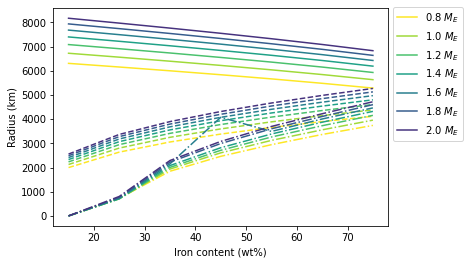

In [31]:
## File data_IS.res : all runs

filename = folder+"data_IS.res"
names = ["M", "C_Fe", "C_FeM", "Psurf", "Rp", "Rc", \
           "RRc", "gs", "rho_c", "rho_m", "Cp_c",\
          "Cp_m", "alpha_c", "alpha_m", "k_m", \
           "shear_m", "Gruneisen", "Ts",  "Tc_adiab", \
         "pc", "DTc", "Tc0", "pc0", "gr_c",
         "r_ICB", "p_ICB", "iter_outer", "iter_inner"] 

data = pd.read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names, index_col=False)

C_FeM = 10.
data = data[data.C_FeM == C_FeM]
 
fig, ax = plt.subplots()
Masses = [0.8, 1.,  1.2,  1.4,  1.6, 1.8, 2.]
mycm = plt.cm.viridis_r((np.array(Masses)-0.8)/1.4)

for i, M in enumerate(Masses):
    data_Fe = data[data["M"]==M]
    ax.plot(data_Fe["C_Fe"],data_Fe["Rp"]/1e3,  color=mycm[i], label="{} $M_E$".format(M))
    ax.plot(data_Fe["C_Fe"],data_Fe["Rc"]/1e3, '--', color=mycm[i], label="")
    ax.plot(data_Fe["C_Fe"],data_Fe["r_ICB"]/1e3, '-.', color=mycm[i])
    
ax.set_ylabel("Radius (km)")
ax.set_xlabel("Iron content (wt%)")
ax.legend(bbox_to_anchor=(1., 1.03))
plt.savefig(folder + "Radius_planet_core_inner_core_CFe_{}.pdf".format(C_FeM), bbox_inches="tight")

0.0
1937462.4443
3121349.41103
3958719.5057599996
0.0
2289758.42381
3698257.2936699996
4718947.080019999


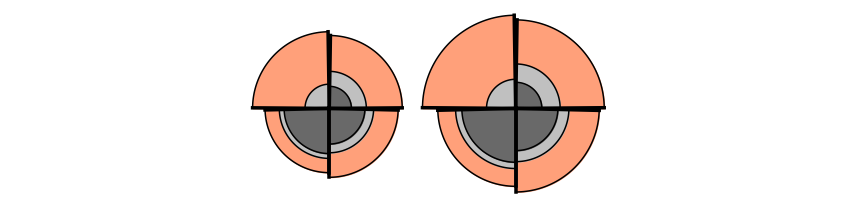

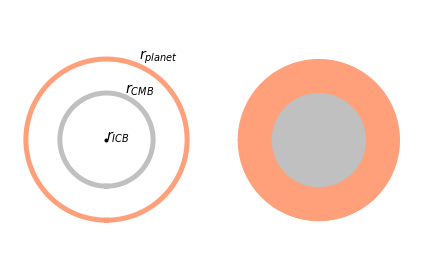

In [34]:
def x(r, theta):
    return r*np.sin(theta)
def y(r, theta):
    return r*np.cos(theta)

n_CFe = 4
n_M = 7
n_t = 50
Masses = [1,2]
n_M = 4
CFe = [15., 35., 55., 75.]
theta = np.linspace(-np.pi, np.pi, n_CFe*n_t)
max_R = data["Rp"].max()

fig, ax = plt.subplots(figsize=[12, 3])

R0_005 = [0,0, 1726671.3105701266, 3481087.409766877,0,0,1142561.1966887491, 3946290.695226116]
R10_005 = [0,905178.5003222738,2780599.956557984,3806748.3306041765,0,594744.2460852044,3209413.959618008,4530219.600387867]

for j, mass in enumerate(Masses): 
    #ax.text((j-0.3)*max_R*2, max_R*1.1, "{} $M_E$". format(mass))
    for i, Fe in enumerate(CFe):
        if i==n_CFe-1:
            th = theta[0:n_t]
        else:    
            th = theta[i*n_t+n_t:i*n_t+n_t+n_t]
        r = data[(data["M"]==mass) & (data["C_Fe"]==Fe)] 
        Rp = r.iloc[0]["Rp"]
        Rc = r.iloc[0]["Rc"]
        Ricb = r.iloc[0]["r_ICB"]
        #Ricb = R10_005[(i)+j*len(CFe)]
        print (Ricb)
        
        r_planet = ax.plot(Rp*np.sin(th)+2*j*max_R, Rp*np.cos(th), 'black',linewidth=1.5)
        ax.fill_between(Rp*np.sin(th)+2*j*max_R,0,Rp*np.cos(th),color='lightsalmon')
        ax.plot(Rc*np.sin(th)+2*j*max_R, Rc*np.cos(th), 'black',linewidth=1.5)
        ax.fill_between(Rc*np.sin(th)+2*j*max_R,0,Rc*np.cos(th),color='silver')
        ax.plot(Ricb*np.sin(th)+2*j*max_R, Ricb*np.cos(th), 'black')
        ax.fill_between(Ricb*np.sin(th)+2*j*max_R,0,Ricb*np.cos(th),color='dimgrey')
        ax.plot([0, Rp*np.sin(th[0])]+2*j*max_R, [0, Rp*np.cos(th[0])], "black",linewidth=3.5)
        ax.plot([0, Rp*np.sin(th[-1])]+2*j*max_R, [0, Rp*np.cos(th[-1])], "black",linewidth=3.5)
plt.axis('equal')
plt.axis("off")
plt.tight_layout()
plt.savefig(folder + "radius_poster.pdf")

r = data[(data["M"]==1.) & (data["C_Fe"]==45)]
Rp = r.iloc[0]["Rp"]
Rc = r.iloc[0]["Rc"]
Ricb = r.iloc[0]["r_ICB"]
Ricb = 0*Rc
fig, ax = plt.subplots()
ax.plot(Rp*np.sin(theta), Rp*np.cos(theta), 'lightsalmon',linewidth=5)
ax.fill_between(Rp*np.sin(theta)+2*j*max_R,0,Rp*np.cos(theta),color='lightsalmon')
ax.plot(Rc*np.sin(theta), Rc*np.cos(theta), 'silver',linewidth=5)
ax.fill_between(Rc*np.sin(theta)+2*j*max_R,0,Rc*np.cos(theta),color='silver')
ax.plot(Ricb*np.sin(theta), Ricb*np.cos(theta), 'dimgrey',linewidth=5)
ax.fill_between(Ricb*np.sin(theta)+2*j*max_R,0,Ricb*np.cos(theta),color='dimgrey')
ax.text(Ricb*0.6,Ricb*1,'$r_{ICB}$',fontsize = 14,weight='bold')
ax.text(Rc*0.4,Rc*1,'$r_{CMB}$',fontsize=14,weight='bold')
ax.text(Rp*0.4,Rp*1,'$r_{planet}$',fontsize=14,weight='bold')
ax.scatter(0,0, c="k", marker=".")
plt.axis('equal')
plt.axis("off")
plt.tight_layout()
plt.savefig("singleplanet.pdf")

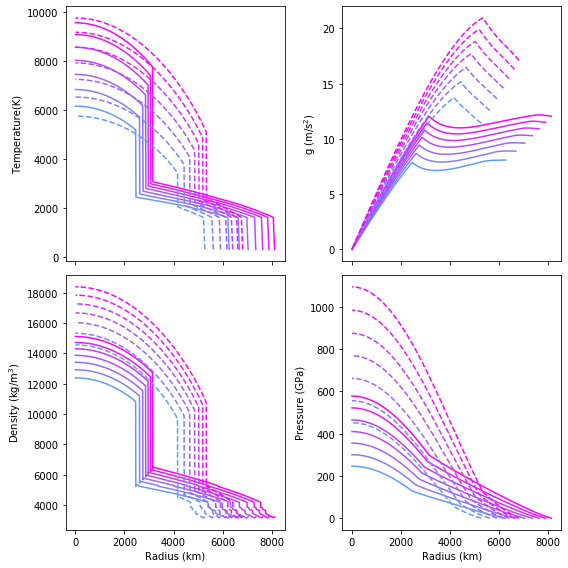

In [44]:
## radial profiles

if folder == "./Ini_With_DTcmb/":# or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

#filename = "/home/marine/ownCloud/Research/Projets/Core_size/October2018/data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res"

fig, ax3 = plt.subplots(2,2, figsize=[8,8], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]    
mycm = plt.cm.cool(np.array(Masses)/2.)

def figure(data, i, symb="-"): 
    ax3[0,0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i])
    ax3[0,1].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i])
    ax3[1,0].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i])
    ax3[1,1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i])

    
files = ["data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res"]

    
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i)
    
files = ["data_prof_M_ 0.8_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--')


ax3[0,0].set_ylabel("Temperature(K)")
ax3[0,1].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[1,1].set_ylabel("Pressure (GPa)")
ax3[1,0].set_xlabel("Radius (km)")
ax3[1,1].set_xlabel("Radius (km)")
plt.tight_layout()
plt.savefig(folder + "profiles.pdf")


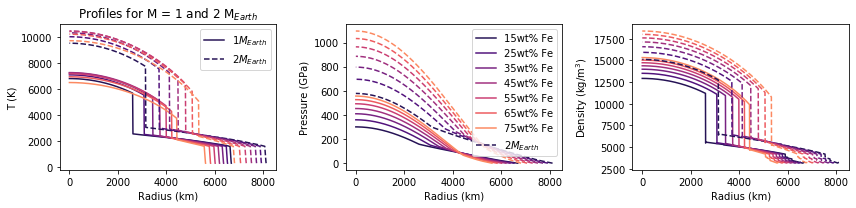

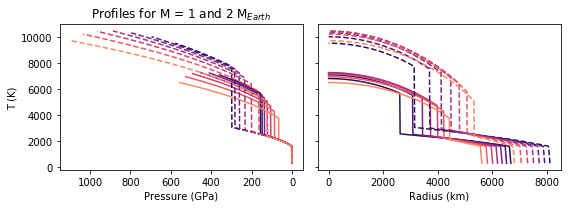

In [45]:
fig, ax = plt.subplots(1,3, sharex=True,figsize=[12,3])

fig2, ax2 = plt.subplots(1,2, sharey=True,figsize=[8,3])

#names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
#         "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
    
files = ["data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res"]

CFe = [15, 25, 35, 45, 55, 65, 75]  
mycm = plt.cm.magma(np.array(CFe)/100.)

def figure(data, i, symb="-", label=None, M=1): 
    ax[0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)
    if M == 1: 
        label = "{}wt% Fe".format(CFe[i])
    else: label == ""
    if label == "M = 2M_{Earth}": label=""
    ax[1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=label)
    ax[2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=label)
    ax2[0].plot(data["p(GPa)"], data["T(K)"], symb, color=mycm[i], label=label)
    ax2[1].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i == 0.:
        label = "1$M_{Earth}$"
    else: label = ""
    figure(data, i, label=label)
    
    
    
files = ["data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i == 0.:
        label = "2$M_{Earth}$"
    else: label = ""
    figure(data, i, "--", label=label, M=2)
    
ax[0].set_ylabel("T (K)")
ax[1].set_ylabel("Pressure (GPa)")
ax[2].set_ylabel("Density (kg/m$^3$)")
ax[2].set_xlabel("Radius (km)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_xlabel("Radius (km)")

ax[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.figure(fig.number)
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig(folder + "profiles_M1_2Earth.pdf")

plt.figure(fig2.number)
ax2[0].set_xlabel("Pressure (GPa)")
ax2[1].set_xlabel("Radius (km)")
ax2[0].set_ylabel("T (K)")
ax2[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.tight_layout()
ax2[0].invert_xaxis()
plt.savefig(folder + "pressure_Temperature_1_2MEarth.pdf")

./Ini_With_DTcmb/data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res


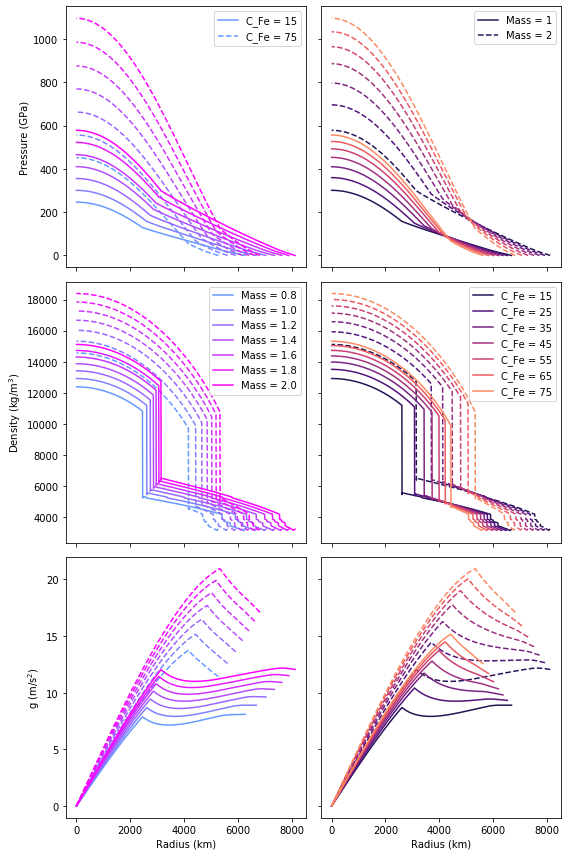

In [46]:
if folder == "./Ini_With_DTcmb/":# or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(3,2, figsize=[8,12], sharex=True, sharey='row')


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]


def figure(data, i, symb="-", column=0, label="", label2=""): 
    _label = ""
    if column == 0:
        if i == 0:
            _label = label
    elif column == 1:
        if i == 0:
            _label = label
    ax3[0, column].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=_label)
    _label = label2
    ax3[1, column].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=_label)
    ax3[2, column].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i], label="")

def file(M, Fe):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_ 0.0000.res".format(M, Fe)
   
print(file(0.8, 15))
    
mycm = plt.cm.cool(np.array(Masses)/2.)
for i, M in enumerate(Masses):
    filename = file(M, 15)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i, label="C_Fe = 15", label2="Mass = {}".format(M))
    filename = file(M, 75)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', label="C_Fe = 75")

mycm = plt.cm.magma(np.array(Fe)/100.)
for i, C in enumerate(Fe):
    filename = file(1.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, column=1, label="Mass = 1", label2="C_Fe = {}".format(C))
    filename = file(2.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', column=1, label="Mass = 2")

ax3[2,0].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[0,0].set_ylabel("Pressure (GPa)")
ax3[2,0].set_xlabel("Radius (km)")
ax3[2,1].set_xlabel("Radius (km)")
plt.tight_layout()
ax3[0,0].legend()
ax3[0,1].legend()
ax3[1,0].legend()
ax3[1,1].legend()
plt.savefig(folder+"profiles_P_rho_g.pdf")

./Ini_With_DTcmb/data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res


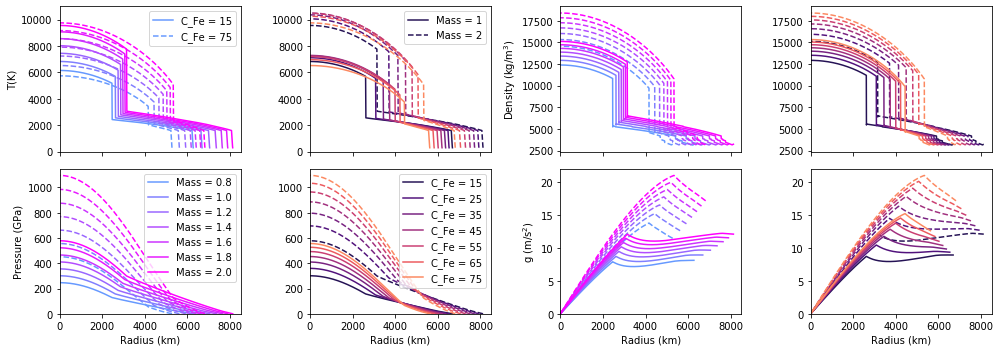

In [47]:
if folder == "./Ini_With_DTcmb/":# or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(2, 4, figsize=[14,5], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]


def figure(data, i, symb="-", column=0, label="", label2=""): 
    _label = ""
    if column == 0:
        if i == 0:
            _label = label
    elif column == 1:
        if i == 0:
            _label = label
    ax3[0, column].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=_label)
    _label = label2
    ax3[1, column].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=_label)
    ax3[0, column+2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=_label)
    ax3[1, column+2].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i], label="")

def file(M, Fe):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_ 0.0000.res".format(M, Fe)
   
print(file(0.8, 15))
    
mycm = plt.cm.cool(np.array(Masses)/2.)
for i, M in enumerate(Masses):
    filename = file(M, 15)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i, label="C_Fe = 15", label2="Mass = {}".format(M))
    filename = file(M, 75)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', label="C_Fe = 75")

mycm = plt.cm.magma(np.array(Fe)/100.)
for i, C in enumerate(Fe):
    filename = file(1.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, column=1, label="Mass = 1", label2="C_Fe = {}".format(C))
    filename = file(2.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', column=1, label="Mass = 2")

ax3[0,0].set_ylabel("T(K)")
ax3[1,2].set_ylabel("g (m/s$^2$)")
ax3[0,2].set_ylabel("Density (kg/m$^3$)")
ax3[1,0].set_ylabel("Pressure (GPa)")
ax3[1,0].set_xlabel("Radius (km)")
ax3[1,1].set_xlabel("Radius (km)")
ax3[1,2].set_xlabel("Radius (km)")
ax3[1,3].set_xlabel("Radius (km)")
plt.tight_layout()
ax3[0,0].legend()
ax3[0,1].legend()
ax3[1,0].legend()
ax3[1,1].legend()
ax3[0,0].set_ylim([0, 11000])
ax3[0,1].set_ylim([0, 11000])
ax3[1,0].set_ylim([0,1150])
ax3[1,1].set_ylim([0,1150])
ax3[1,2].set_ylim([0,22])
ax3[1,3].set_ylim([0,22])
ax3[0,0].set_xlim([0, 8500])

plt.tight_layout()
plt.savefig(folder+"profiles_T_P_rho_g.pdf")

## Find pressure and temperature at the CMB



In [48]:
def file(M, Fe, FeM=0):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_{:2d}.0000.res".format(M, Fe, FeM)

def find_CMB(profiles):
    core = profiles[profiles["Material-Parameter"]==8.]
    #print(core)
    index_max = core["r(m)"].idxmax()
    return index_max, core["r(m)"].iloc[0], core["p(GPa)"].iloc[0], core["T(K)"].iloc[0]
    
def center(profiles): 
    return profiles["r(m)"].iloc[-1], profiles["p(GPa)"].iloc[-1], profiles["T(K)"].iloc[-1]

def T_liquidus_mantle(P, FeM=0.):
    """ 5400 * (p/140)^{0.48} / (1 - ln(1-\#Fe_{\rm M}) ) """
    return 5400.*(P/140)**0.48/(1-np.log(1-FeM))

def T_liquidus_core(P, S=0):
    """ T_{\rm melt} = 6500 * (p/340)^{0.515} / (1 - ln(1-X_{\rm S}) ) """
    return 6500.*(P/340)**0.515/(1-np.log(1-S))

def find_rIC(profiles, S=0):
    core = profiles[profiles["Material-Parameter"]==8.]
    Temperature = core["T(K)"].values
    Pressure = core["p(GPa)"].values
    Radius = core["r(m)"].values
    T_liq = T_liquidus_core(Pressure, S)
    index = np.argmin(np.abs(Temperature-T_liq))
    return Radius[index]
    


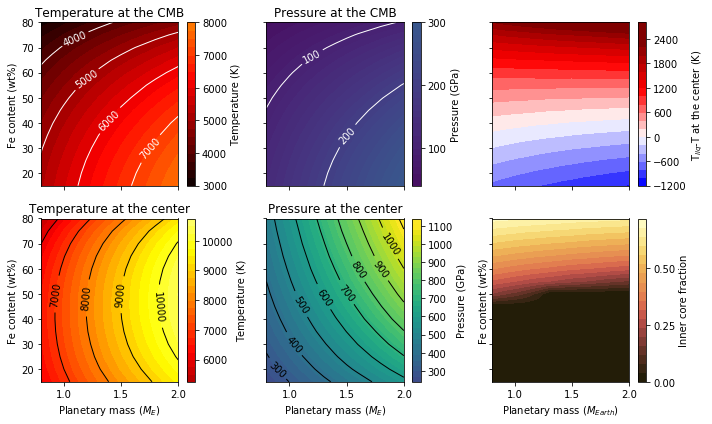

In [49]:
if folder == "./Ini_With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 20, 25, 30, 35, 40, 45, 50,  55, 60,  65, 70,  75, 80]

filename = file(1.0, 25)
data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)

M, F = np.meshgrid(Masses, Fe)
Values_T_CMB = np.zeros_like(M)
Values_P_CMB = np.zeros_like(M)
Values_r_CMB = np.zeros_like(M)
Values_T_0 = np.zeros_like(M)
Values_P_0 = np.zeros_like(M)
Values_r_0 = np.zeros_like(M)
rIC = np.zeros_like(M)
Rp = np.zeros_like(M)

for i, mass in enumerate(Masses):
    for j, iron in enumerate(Fe):
        filename = file(mass, iron, 0)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
        index, Values_r_CMB[j, i], Values_P_CMB[j, i], Values_T_CMB[j, i] = find_CMB(data)
        Values_r_0[j, i], Values_P_0[j, i], Values_T_0[j, i] = center(data)
        rIC[j, i] = find_rIC(data, S=0.05)
        Rp[j,i] = data["r(m)"].iloc[0]

fig, ax = plt.subplots(2, 3, figsize=[10,6], sharey=True, sharex=True)

ticks_T = np.linspace(0, 12000, 13)
ticks_P = np.linspace(0, 1100, 12)
#plt.savefig(folder+"/T_M_Fe_CMB.pdf")


# fig, ax = plt.subplots()
sc = ax[0,0].contourf(M, F, Values_T_CMB, 20, cmap = plt.cm.hot, vmin=3000, vmax=12000)
sc2 = ax[0,0].contour(M, F, Values_T_CMB, levels=ticks_T, colors=('white',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'white', fontsize=10)

#ax[0,0].set_xlabel("Mass (per Earth mass)")
ax[0,0].set_ylabel("Fe content (wt%)")
cb  = fig.colorbar(sc, ax=ax[0,0], ticks=ticks_T)
cb.set_label("Temperature (K)")

sc = ax[1,0].contourf(M, F, Values_T_0, 20, cmap = plt.cm.hot, vmin=3000, vmax=12000)
sc2 = ax[1,0].contour(M, F, Values_T_0, levels=ticks_T, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)
ax[1,0].set_xlabel("Planetary mass ($M_{E}$)")
ax[1,0].set_ylabel("Fe content (wt%)")
cb = plt.colorbar(sc, ax=ax[1,0], ticks=ticks_T)
cb.set_label("Temperature (K)")
#sc.set_clim(3000, 11000)

sc = ax[0,1].contourf(M, F, Values_P_CMB, 30,cmap = plt.cm.viridis, vmin=0, vmax=1100)
sc2 = ax[0,1].contour(M, F, Values_P_CMB, levels=ticks_P, colors=('white',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'white', fontsize=10)
#ax[0,1].set_xlabel("Mass (per Earth mass)")
cb = plt.colorbar(sc, ax=ax[0,1], ticks=ticks_P)
cb.set_label("Pressure (GPa)")

sc = ax[1,1].contourf(M, F, Values_P_0, 30
                , cmap = plt.cm.viridis, vmin=0, vmax=1100)
sc2 = ax[1,1].contour(M, F, Values_P_0, levels=ticks_P, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)
ax[1,1].set_xlabel("Planetary mass ($M_{E}$)")
cb = plt.colorbar(sc, ax=ax[1,1], ticks=ticks_P)
cb.set_label("Pressure (GPa)")


sc = ax[1,2].contourf(M, F, (rIC/1e3)/(Rp/1e3), 20, cmap = lajolla_r)

ax[1,2].set_xlabel("Planetary mass ($M_{Earth}$)")
#ax[0,2].set_ylabel("Iron content (%mass)")
#cb  = fig.colorbar(sc, ax=ax[1,2], ticks=np.linspace(0, 4000, 5))
ax[1,2].set_ylabel("Fe content (wt%)")
cb  = fig.colorbar(sc, ax=ax[1,2], ticks=np.linspace(0, 1, 5))
cb.set_label("Inner core fraction")


sc = ax[0,2].contourf(M, F, T_liquidus_core(Values_P_0, S=0)-Values_T_0, 20, cmap = plt.cm.seismic, vmin=-2300, vmax=2300)
#ax[0,0].set_xlabel("Mass (per Earth mass)")
#ax[1,2].set_ylabel("Iron content (%mass)")

cb  = fig.colorbar(sc, ax=ax[0,2])
cb.set_label("T$_{liq}$-T at the center (K)")


ax[0,0].set_title("Temperature at the CMB")
ax[1,0].set_title("Temperature at the center")
ax[0,1].set_title("Pressure at the CMB")
ax[1,1].set_title("Pressure at the center")
#ax[0,2].set_title("Temperature difference")
#ax[1,2].set_title("Inner core fraction")


plt.tight_layout()
plt.savefig(folder+"/temperature_CMB_center.pdf")

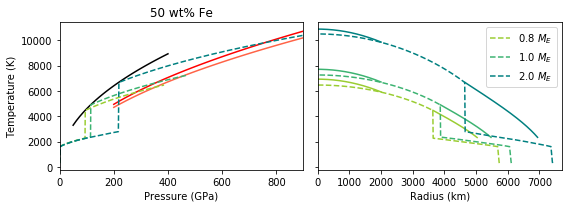

In [50]:
if folder == "./Ini_With_DTcmb/":# or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=[8, 3])

def file(M, Fe, FeM=0):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_{:2d}.0000.res".format(M, Fe, FeM)

   
#file_08 = file(0.8, 35, 0)
#file_1 = file(1.0, 35, 0)
#file_2 = file(2.0, 35, 0)

#mark = [":", "-.", "--"]
mark = ["--","--","--"]
masses = np.array([0.8, 1.0, 2.0])
#cm = plt.cm.Dark2((masses-0.4)/4)
cm = ["yellowgreen","mediumseagreen","teal"]


P = np.linspace(50, 400, 30)
ax[0].plot(P, T_liquidus_mantle(P), "k")#, label="Mantle liquidus")

P = np.linspace(200, 900, 30)
ax[0].plot(P, T_liquidus_core(P), "r")#, label="Core liquidus -- pure Fe")
ax[0].plot(P, T_liquidus_core(P, 0.05), "tomato")#, label="Core liquidus -- 5% LE")
#ax[0].plot(P, T_liquidus_core(P, 0.10), "lightsalmon", label="Core liquidus -- 10% LE")

for i, mass in enumerate(masses):
    data = pd.read_csv(file(mass, 50, 0), skipinitialspace=True, sep=" ", names=names, index_col=False)
    ax[0].plot(data["p(GPa)"], data["T(K)"], mark[i], color=cm[i], label= "")
    ax[1].plot(data["r(m)"]/1e3, data["T(K)"], mark[i], color=cm[i], label="{} $M_E$".format(mass))

    #print(data)
    deep_mantle = data[(data["Material-Parameter"] == 7.) | (data["Material-Parameter"] == 6.)]
    core = data[(data["r(m)"] <2e6)]
    #print(deep_mantle)
    ax[1].plot(deep_mantle["r(m)"]/1e3, T_liquidus_mantle(deep_mantle["p(GPa)"]), color=cm[i], label="")
    ax[1].plot(core["r(m)"]/1e3, T_liquidus_core(core["p(GPa)"]), color=cm[i], label= "")
    
ax[0].set_xlabel("Pressure (GPa)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_ylabel("Temperature (K)")
ax[1].legend(fontsize="medium")
ax[0].set_xlim([0, 900])
ax[1].set_xlim([0, 7700])

#ax[0].set_title("Temperature profiles for 45wt% of Fe")
ax[0].set_title("50 wt% Fe")

plt.tight_layout()
plt.savefig(folder+"/temperature_profiles.pdf")

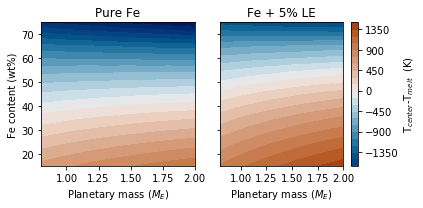

In [51]:
if folder == "./Ini_With_DTcmb/":# or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]

M, F = np.meshgrid(Masses, Fe)
Values_DT_0 = np.zeros_like(M)
Values_DT_5 = np.zeros_like(M)




for i, mass in enumerate(Masses):
    for j, iron in enumerate(Fe):
        filename = file(mass, iron, 0)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
        pressure = data["p(GPa)"].iloc[-1] 
        T_center = data["T(K)"].iloc[-1]
        DT = T_liquidus_core(pressure, 0.05) -T_center
        Values_DT_5[j, i] = -DT
        DT = T_liquidus_core(pressure, 0) -T_center
        Values_DT_0[j, i] = -DT

        
        
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[6, 3])
maximum_0 = np.amax(np.abs(Values_DT_0))
maximum_5 = np.amax(np.abs(Values_DT_5))
maximum = max(maximum_0, maximum_5)
#sc = ax[0].contourf(M, F, Values_DT_0, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
#sc2 = ax[1].contourf(M, F, Values_DT_5, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
sc = ax[0].contourf(M, F, Values_DT_0, 20, cmap = vik, vmin=-maximum, vmax =maximum)
sc2 = ax[1].contourf(M, F, Values_DT_5, 20, cmap = vik, vmin=-maximum, vmax =maximum)
#ax.contour(M, F, np.sign(Values_DT), 10)

ax[0].set_xlabel("Planetary mass ($M_{E}$)")
ax[1].set_xlabel("Planetary mass ($M_{E}$)")
ax[0].set_ylabel("Fe content (wt%)")
#cb = plt.colorbar(sc, ax = ax[0])
cb = plt.colorbar(sc2, ax=ax[1])
cb.set_label("T$_{center}$-T$_{melt}$  (K)")
ax[0].set_title("Pure Fe")
ax[1].set_title("Fe + 5% LE")
plt.tight_layout()

plt.savefig(folder + "/Delta_T.pdf")

### Temporal variations

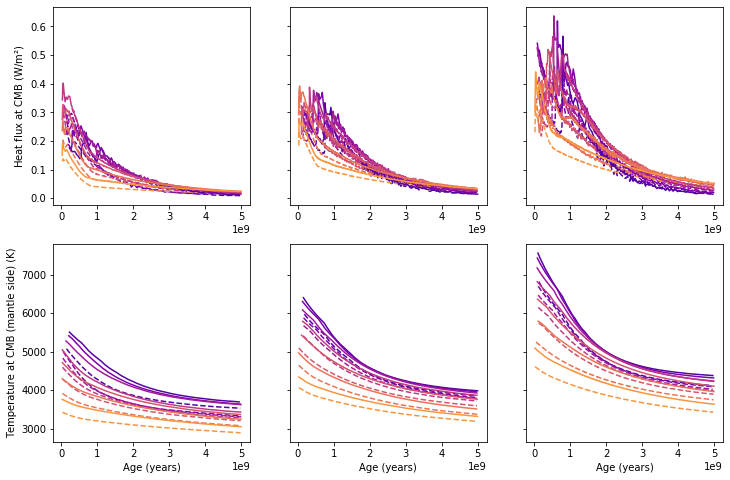

In [16]:
### temporal variations

folder= "./input/"
names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
#data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names)

#data.plot("t(yr)", "qc(W/m²)")

M = [8, 10, 12, 14, 16, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(2, 3,sharey='row', figsize=[12,8])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = folder+"qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass < 12:
            if mass == 8: symb = "--"
            else: symb = "-"
            ax[0,0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,0].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        elif mass < 16:
            if mass == 12: symb = "--"
            else: symb = "-"
            ax[0,1].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        else:
            if mass == 16: symb = "--"
            else: symb = "-"
            ax[0,2].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,2].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0,0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1,0].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[1,1].set_xlabel("Age (years)")
ax[1,2].set_xlabel("Age (years)")
ax[1,0].set_xlabel("Age (years)")

plt.savefig(folder+"time_evolution_onlyCFeM0.pdf")

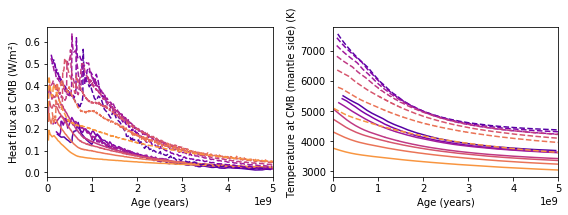

In [17]:
# temporal variations

filename = "qc_T_M10_Fe45_FeM0.txt"
names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
files_10 = ["qc_T_M10_Fe15_FeM0.txt",
         "qc_T_M1_Fe25_FeM0.txt",]

M = [10, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(1, 2, figsize=[8, 3])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = "qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass == 10: 
            symb = "-"
            label_q = "C_Fe = {}".format(CFe)
        else: 
            symb = "--"
            label_q = ""
        ax[0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
        ax[1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[0].set_xlabel("Age (years)")
ax[1].set_xlabel("Age (years)")
ax[0].set_xlim([0, 5e9])
ax[1].set_xlim([0, 5e9])

plt.tight_layout()
plt.savefig(folder + "time_evolution_onlyCFeM0_mass_1&2.pdf")